<a href="https://colab.research.google.com/github/cam2149/MachineLearningII/blob/main/05_PCA-Ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Componentes Principales (PCA)

Ahora que estamos familiarizados con la intuición, implementemos un algoritmo básico de  PCA en Python desde cero. Necesitamos las bibliotecas numpy, pandas y matplotlib para mejorar la complejidad computacional y la visualización de los resultados. El algoritmo se puede encontrar en la página https://www.askpython.com/python/examples/principal-component-analysis. ==> https://www.askpython.com/python/examples/principal-component-analysis

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math

#Generate a dummy dataset.
X = np.random.randint(10,50,100).reshape(20,5)
# mean Centering the data
X_meaned = X - np.mean(X , axis = 0)

Restamos la media de cada variable del conjunto de datos para que el conjunto de datos se centre en el origen. Hacer esto resulta muy útil al calcular la matriz de covarianza.

In [2]:
# calculating the covariance matrix of the mean-centered data.
cov_mat = np.cov(X_meaned , rowvar = False)

Ahora, calculamos los autovalores y autovectores para la matriz de covarianza calculada. Los vectores propios de la matriz de covarianza que obtenemos son ortogonales entre sí y cada vector representa un eje principal.

In [3]:
#Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

Recuerde que cada columna en la matriz de vectores Eigen corresponde a un componente principal, por lo que organizarlas en orden descendente de su valor propio organizará automáticamente el componente principal en orden descendente de su variabilidad.

In [4]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]

sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors
sorted_eigenvectors = eigen_vectors[:,sorted_index]

Escoja el número de componentes principales

In [5]:
# select the first n eigenvectors, n is desired dimension
# of our final reduced data.

n_components = 2 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

Finalmente, transforme los datos teniendo un producto escalar entre el subconjunto de vectores propios y los datos centrados en la media. El resultado del producto escalar,  son los datos reducidos a dimensiones inferiores desde dimensiones superiores.

In [6]:
#Transform the data
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()

Ahora, combinemos todo lo anterior creando una función y probando en un ejemplo.

In [7]:
def PCA(X , num_components):

    #Step-1
    X_meaned = X - np.mean(X , axis = 0)

    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)

    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]

    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]

    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()

    return X_reduced

In [8]:
import pandas as pd

#Get the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

#prepare the data
x = data.iloc[:,0:4]

#prepare the target
target = data.iloc[:,4]

#Applying it to PCA function
mat_reduced = PCA(x , 2)

#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])

#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

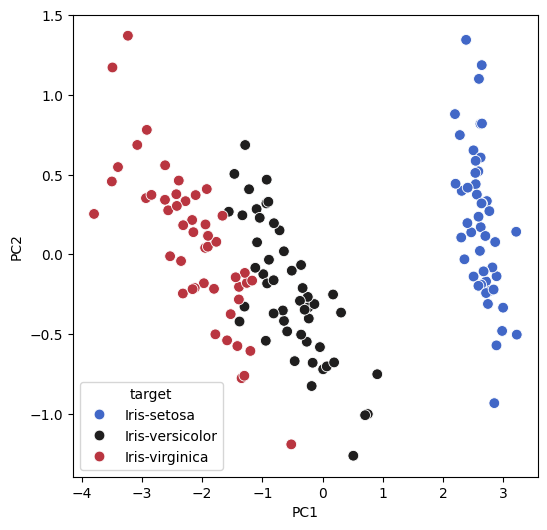

In [9]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')
plt.show()
